<a href="https://colab.research.google.com/github/Sonu2252/Abhi/blob/master/Stock_market_Prediction_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
import pandas as pd

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv")

In [3]:
df.head() 

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df2 = df.reset_index()['close']

In [5]:
df2[1258:]

Series([], Name: close, dtype: float64)

In [6]:
df2

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [7]:
df2.shape

(1258,)

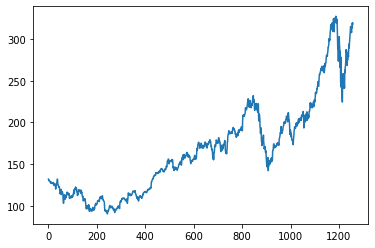

In [8]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [9]:
import numpy as np


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

In [11]:
training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data, test_data = df2[0:training_size,:], df2[training_size:len(df2), :1]

In [12]:
training_size

817

In [13]:
test_size

441

In [14]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [15]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [20]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [22]:
model_1 = Sequential([
        LSTM(50, return_sequences=True, input_shape=(100, 1)),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(1)
])


In [23]:
model_1.compile(loss='mean_squared_error',
                optimizer='adam')

In [24]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
12/12 [==============================] - 24s 121ms/step - loss: 0.0200 - val_loss: 0.0786
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0041 - val_loss: 0.0065
Epoch 3/100
12/12 [==============================] - 0s 20ms/step - loss: 9.9234e-04 - val_loss: 0.0087
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 9.6141e-04 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 0s 20ms/step - loss: 6.8224e-04 - val_loss: 0.0048
Epoch 6/100
12/12 [==============================] - 0s 20ms/step - loss: 6.4874e-04 - val_loss: 0.0044
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 6.3308e-04 - val_loss: 0.0042
Epoch 8/100
12/12 [==============================] - 0s 20ms/step - loss: 6.4667e-04 - val_loss: 0.0048
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 6.2792e-04 - val_loss: 0.0043
Epoch 10/100
12/12 [==============================] - 0s 21ms/step - l

In [26]:
train_predict = model_1.predict(X_train)
test_predict = model_1.predict(X_test)

In [27]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


142.76329524155025

In [29]:
math.sqrt(mean_squared_error(y_test,test_predict))

240.03688110577642